# Tarea 6

# Regresiones y FIFA 🔙⚽️

Para esta tarea trabajaremos con un dataset en el cual se incluyen los datos y atributos de habilidad de todos los jugadores que están disponibles en el _modo Carrera_ del videojuego FIFA 18. Podríamos usar el dataset incluso del FIFA 21 pero más adelante verás la razón de usar el del 18 👾☠️🐍.

En el dataset podemos encontrar:

* Datos personales del jugador (nacionalidad, club, fecha de nacimiento, salario, etc).
* Estadísticas del jugador (ataque, habilidades, defensa, mentalidad, habilidades, etc).
* Posición del jugador (tanto en su club con en su selección nacional).
* Más de 100 atributos de todo tipo.


**SPOILER ALERT**: En esta tarea lo _"único"_ que haremos es tratamiento de datos y una regresión que nos permita predecir el *value* (valor en el mercado) de un jugador en función de sus aptitudes.

-------------------
# Ejercicio 1

Importa:

* La trinidad de la Ciencia de Datos (pandas, numpy, matplotlib). 

* La [regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de **scikit-learn** y la librería de [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para crear los conjuntos de _prueba_ y _entrenamiento_ de nuestro modelo.

* Metricas de evaluación de **scikit-learn**.

* Las librerías que desees para la visualización de los datos/resultados.

**HINT**: Revisa el Notebook de la clase 6 (El que se llama *1_AI_ML_Metodologia_y_Regresion_lineal_multilineal*), ahí importamos todo esto.

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [43]:
from sklearn.metrics import (mean_squared_error,r2_score, roc_auc_score,
                            classification_report, confusion_matrix,
                            roc_curve, accuracy_score)
import seaborn as sns 
import scikitplot as skplt

# Ejercicio 2 

* Lee el archivo FIFA18.csv contenido en la carpeta de la tarea. 

* Indaga en tu DataFrame para darte una idea de las variables. ¿Tienes columnas con variables que consideres **NO** aporten nada a tu modelo predictivo? 

* Para predecir el _value_ de cada jugador, utilizaremos las variables correspondientes a sus atributos. Filtra tu DataFrame y quedate sólo con las siguientes columnas.

* Haz un .info() sobre DataFrame. ¿Ves algo raro? 

In [4]:
df=pd.read_csv("FIFA18.csv")

C:\Users\iVoy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.columns


Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [6]:
df.Stamina

0        92
1        73
2        78
3        89
4        44
         ..
17976    28
17977    32
17978    33
17979    49
17980    55
Name: Stamina, Length: 17981, dtype: object

In [7]:
df.head()
#Las columnas que probablemente no aportarían nada al modelo serían: Photo,Flag, club Logo 

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
datos=df[['Name', 'Age', 'Overall', 'Value', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
            'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 
            'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
            'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
            'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
            'Strength', 'Vision', 'Volleys']]

# Ejercicio 3

Si supuestamente estamos trabajando con variables numéricas ¿por qué motivo Python las esta leyendo como objetos? (**Este es el motivo por el cual elegimos el dataset del FIFA 18**).

El dataset del FIFA 18, como vimos en clase, tiene datos de la forma "74+6", los cuales indican el momentum positivo o negativo que está teniendo el jugador en su respectiva liga. Los dataset de otros FIFA no vienen así y a nosotros nos gusta complicarnos 😬 ¡Mentira! Ese _"+ algo"_ además de ser información valiosa sobre las buenas o malas rachas del jugador es el pretexto perfecto para hablar de la función [eval()](https://www.programiz.com/python-programming/methods/built-in/eval).

La función eval() lo que hace es tomar un string cualquiera y lo evalúa en la calculadora de Python, por ejemplo:

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 38 columns):
Name                  17981 non-null object
Age                   17981 non-null int64
Overall               17981 non-null int64
Value                 17981 non-null object
Acceleration          17981 non-null object
Aggression            17981 non-null object
Agility               17981 non-null object
Balance               17981 non-null object
Ball control          17981 non-null object
Composure             17981 non-null object
Crossing              17981 non-null object
Curve                 17981 non-null object
Dribbling             17981 non-null object
Finishing             17981 non-null object
Free kick accuracy    17981 non-null object
GK diving             17981 non-null object
GK handling           17981 non-null object
GK kicking            17981 non-null object
GK positioning        17981 non-null object
GK reflexes           17981 non-null object
Heading accur

In [10]:
eval('74+6')

80

Con esto en mente, modificaremos nuestros datos para convertir nuestras variables numerias a tipo int y no perder esa información extra que por otros métodos, estaríamos descartado (como en la clase, donde literal, _"nos volamos"_ ese _"+ algo"_).

* **Paso 1**: Adapta las siguientes lineas a tu código. 

In [11]:
for i in datos.columns:
    print('\n', i)
    print(datos[i].unique())


 Name
['Cristiano Ronaldo' 'L. Messi' 'Neymar' ... 'A. Kelsey' 'B. Richardson'
 'L. Sackey']

 Age
[32 30 25 31 28 26 27 29 39 23 24 35 33 34 36 21 22 18 20 19 37 38 40 17
 44 41 16 43 47]

 Overall
[94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47
 46]

 Value
['€95.5M' '€105M' '€123M' '€97M' '€61M' '€92M' '€64.5M' '€90.5M' '€79M'
 '€77M' '€52M' '€83M' '€59M' '€67.5M' '€57M' '€69.5M' '€66.5M' '€38M'
 '€4.5M' '€75M' '€70.5M' '€44M' '€48M' '€40M' '€60M' '€34M' '€27M' '€36M'
 '€52.5M' '€65M' '€37.5M' '€48.5M' '€29M' '€29.5M' '€56M' '€56.5M'
 '€44.5M' '€47.5M' '€45M' '€40.5M' '€33M' '€46M' '€42.5M' '€43M' '€34.5M'
 '€25.5M' '€41M' '€22.5M' '€13.5M' '€10.5M' '€51.5M' '€46.5M' '€42M'
 '€24.5M' '€39M' '€22M' '€35.5M' '€30M' '€30.5M' '€43.5M' '€28.5M' '€25M'
 '€26M' '€5M' '€32M' '€39.5M' '€32.5M' '€31M' '€31.5M' '€35M' '€18.5M'
 '€28M' '€23M' '€21M' '€9M' '€11M' '€41.5M' '€38.5M' '€37M' '€27.5M'
 

Ejecutalo y haz una lista llamada **_cols_** donde incluyas el nombre de todas las columnas que tengan el "problema" de datos estilo "68+1". 

In [12]:
cols=datos.columns.tolist()
cols

['Name',
 'Age',
 'Overall',
 'Value',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys']

In [13]:
cols.remove('Name')

In [14]:
cols.remove("Age")

In [15]:
cols.remove("Overall")

In [16]:
cols.remove("Value")

In [17]:
cols

['Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys']

* **Paso 2**: La siguiente función convierte un valor de entrada a string y luego le aplica la función eval().

In [18]:
# Función evaluation
def evaluation(n):
    '''Funcion que convierte un valor de entrada a string y luego le aplica la función eval() '''
    valor = str(n)
    evalua = eval(valor)
    return evalua

* Ejecuta el código anterior para definir la funcion _evaluation_.

* Mapea tu función _evaluation_ sobre las columnas de tu DataFrame que esten listadas en _cols_. 

 **HINT**: el siguiente ciclo for hace el mapeo que nos piden y guarda los resultados dentro de la columna que se haga el mapeo; en otras palabras, el ciclo for evalua cada columna y "actualiza" los datos.

In [19]:
for i in cols:
    datos[i] = list(map(evaluation,datos[i]))

C:\Users\iVoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
datos.tail()

,Name,Age,Overall,Value,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
17976,A. Kelsey,17,46,€50K,24,16,38,26,12,23,...,40,19,19,10,32,28,11,50,26,6
17977,B. Richardson,47,46,€0,25,44,35,44,22,44,...,51,12,13,13,25,32,12,47,17,12
17978,J. Young,17,46,€60K,66,26,60,77,41,50,...,54,42,42,14,51,33,17,32,37,33
17979,J. Lundstram,18,46,€60K,57,46,58,74,43,45,...,49,49,43,47,58,49,48,46,51,25
17980,L. Sackey,18,46,€50K,48,52,49,47,32,33,...,40,31,21,43,49,55,44,67,22,19


* **Paso 3**: Verifiquemos que todo funciona (aún).

    * Adapta el siguiente código a tu DataFrame. Si hiciste los pasos anteriores de forma correcta, los datos de tus columnas ya deberían estar _"evaluados"_, es decir, ya no deberían de tener ese _"+ algo"_.

In [21]:
for i in datos.columns:
    print('________'*10,'\n', i)
    print(datos[i].unique())

________________________________________________________________________________ 
 Name
['Cristiano Ronaldo' 'L. Messi' 'Neymar' ... 'A. Kelsey' 'B. Richardson'
 'L. Sackey']
________________________________________________________________________________ 
 Age
[32 30 25 31 28 26 27 29 39 23 24 35 33 34 36 21 22 18 20 19 37 38 40 17
 44 41 16 43 47]
________________________________________________________________________________ 
 Overall
[94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47
 46]
________________________________________________________________________________ 
 Value
['€95.5M' '€105M' '€123M' '€97M' '€61M' '€92M' '€64.5M' '€90.5M' '€79M'
 '€77M' '€52M' '€83M' '€59M' '€67.5M' '€57M' '€69.5M' '€66.5M' '€38M'
 '€4.5M' '€75M' '€70.5M' '€44M' '€48M' '€40M' '€60M' '€34M' '€27M' '€36M'
 '€52.5M' '€65M' '€37.5M' '€48.5M' '€29M' '€29.5M' '€56M' '€56.5M'
 '€44.5M' '€47.5M' '€45M' '€40.5M'

**NOTA**: Si cometiste algún error, los cambios se habrán guardados en tu dataset, por lo que deberás de volver a leer los datos de nuevo.

# Ejercicio 4

Nuestra variable objetivo es _'value'_. Los valores de esa columna tienen un formato de la forma €95.5M o €40.3K, así que para homologar la columna:

* Haz una lista de comprensión que mediante el método [replace()](https://datatofish.com/replace-values-pandas-dataframe/) elimine el caracter "€" de todos los datos de la columna _value_.

In [22]:
datos['Value']=[i.replace("€","") for i in datos.Value]

C:\Users\iVoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
datos['Value']

0        95.5M
1         105M
2         123M
3          97M
4          61M
         ...  
17976      50K
17977        0
17978      60K
17979      60K
17980      50K
Name: Value, Length: 17981, dtype: object

# Ejercicio 5

El método [find()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.find.html) es capaz de encontrar una letra o una palabra en una cadena de caracteres. Por ejemplo, si yo quisiera encontrar la palabra "Wafflees" en la frase "Me encantan los Waffles", tendría que hacer algo como:

In [24]:
frase = "Me encantan los Waffles"
frase.find('Waffles')

16

El número que nos devuelve find() se refiere a la posición donde inicia la palabra ó caracter que buscamos. 

Si la palabra o el carácter buscado no se encuentra en el string, el método find() nos devolvera el valor **-1**. Para ejemplificar esto, busquemos la palabra "Navidad" nuevamente en la frase "Me encantan los Waffles":

In [25]:
frase.find('Navidad')

-1

* Adecua el código para que funcione con tu dataset y explica que es lo que hace.

In [26]:
for i in range(0,len(datos)):
    if datos.Value[i].find('M') !=-1:
        datos.Value[i] = float(datos.Value[i].replace('M','')) * 1000000
    elif datos.Value[i].find('K') !=-1:
        datos.Value[i] = float(datos.Value[i].replace('K','')) * 1000

C:\Users\iVoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\iVoy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\iVoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

#### Recorre todas las filas del dataframe, y luego se enfoca solo en la columna 'Value' y recorre cada elemento de la columna: ####
###### * Si encuentra una 'M' la va a reemplazar por un vacío y luego va a multiplicar el valor que queda por 1 millón.#####
###### * Si encuentra una 'K' la va a reemplazar por un vacío y luego va a multiplicar el valor que queda por mil.######

* Hay algunos registros de jugadores que tienen un value de 0 (pobrecitos 😢). Quitalos de tu DataFrame.

* Verifica que el tipo de todas tus variables sea correcto. Específicamente asegurate de que las variables númericas efectivamente sean de **tipo númerico**. De ser necesario, aplica los cambios pertinentes.

In [27]:
datos.drop(datos.loc[datos['Value']=='0'].index, inplace=True)


C:\Users\iVoy\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
datos[datos.Value==0]

,Name,Age,Overall,Value,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys


In [29]:
datos.info()
#Value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17725 entries, 0 to 17980
Data columns (total 38 columns):
Name                  17725 non-null object
Age                   17725 non-null int64
Overall               17725 non-null int64
Value                 17725 non-null object
Acceleration          17725 non-null int64
Aggression            17725 non-null int64
Agility               17725 non-null int64
Balance               17725 non-null int64
Ball control          17725 non-null int64
Composure             17725 non-null int64
Crossing              17725 non-null int64
Curve                 17725 non-null int64
Dribbling             17725 non-null int64
Finishing             17725 non-null int64
Free kick accuracy    17725 non-null int64
GK diving             17725 non-null int64
GK handling           17725 non-null int64
GK kicking            17725 non-null int64
GK positioning        17725 non-null int64
GK reflexes           17725 non-null int64
Heading accuracy      17725 n

In [30]:
datos['Value']=datos.Value.astype('int64')

C:\Users\iVoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17725 entries, 0 to 17980
Data columns (total 38 columns):
Name                  17725 non-null object
Age                   17725 non-null int64
Overall               17725 non-null int64
Value                 17725 non-null int64
Acceleration          17725 non-null int64
Aggression            17725 non-null int64
Agility               17725 non-null int64
Balance               17725 non-null int64
Ball control          17725 non-null int64
Composure             17725 non-null int64
Crossing              17725 non-null int64
Curve                 17725 non-null int64
Dribbling             17725 non-null int64
Finishing             17725 non-null int64
Free kick accuracy    17725 non-null int64
GK diving             17725 non-null int64
GK handling           17725 non-null int64
GK kicking            17725 non-null int64
GK positioning        17725 non-null int64
GK reflexes           17725 non-null int64
Heading accuracy      17725 no

# Ejercicio 6 (Ahora si viene el Machine Learning 🤖)

* Separa las variables predictoras de la variable objetivo ejecutando lo siguiente:

In [32]:
X = ['Age','Overall', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
     'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
     'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
     'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing',
     'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

y = ['Value']

* Usa el método _train_test_split_ para generar tus conjuntos de entrenamiento y de prueba tal y como hicimos en clase.

* Usa el método LinearRegression para ajustar una recta multi-dimensional a tus datos de entrenamiento. 

* Toma tu objeto entrenado, úsalo para predecir la variable value de tu X_test. 

* Utiliza metricas de scikit-learn (mean_squared error o el error porcentual promedio por ejemplo) para calcular el performance de tu modelo. ¿Tu modelo es bueno o es malo?

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datos[X],datos.Value, test_size = 0.2, random_state = 0)

In [36]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred = regressor.predict(X_test)
y_pred[0:10]

array([ 5225281.65855405, 13552830.51716083,  5190095.52106469,
        7237493.18981383,  4387312.71387131, 13079534.7555303 ,
        7775542.23306913,  5657900.59197092,  3735173.95024515,
        5905938.52084968])

In [45]:
print("Mean squared error:", round(np.sqrt(mean_squared_error(y_test,y_pred)),2))


Mean squared error: 3632175.92


In [46]:
print("R*2: %1.4f" % r2_score(y_test,y_pred))

R*2: 0.4997


Considero que no es un buen modelo por el valor de $R^2$, es menor a 0.5

# Ejercicio 7

Por último analizaremos los coeficientes. 

* Busca el código con el que hicimos la siguiente gráfica durante la clase 6.

<center> 
<img src="coef.png" width = 500>
<center> 


 Basate en el para graficar los coeficientes de tu modelo. 
    
 ¿A qué variables les está dando más peso la regresión para aumentar/disminuir el valor de mercado del jugador? ¿Te hace sentido? 

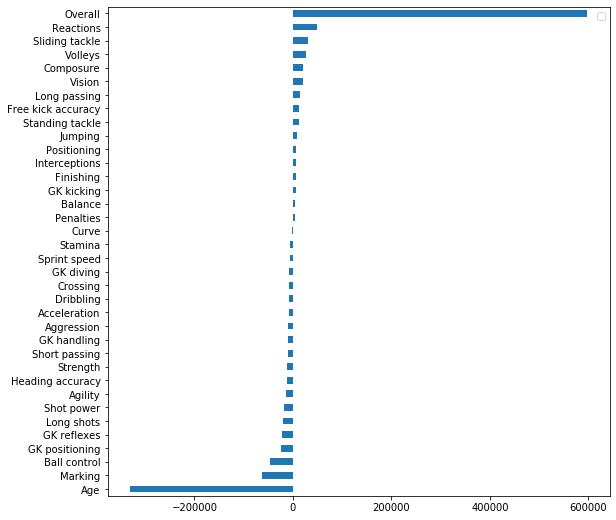

In [47]:
coef = regressor.coef_
coefs = pd.DataFrame(index = X_train.columns, 
                     data =coef,columns=['coeficiente'])

coefs.sort_values('coeficiente').plot.barh(figsize=(9,9))
plt.legend("");

Se le está dando más prioridad a las variables Overall y Age para calcular el valor de un jugador. Tiene sentido que entre más viejo esté el jugador menos quieran pagar por él ya que un jugador más joven tiene más capacidad.